In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)


In [2]:
# Update path if needed
df = pd.read_csv("fraud.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
# Check missing values
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

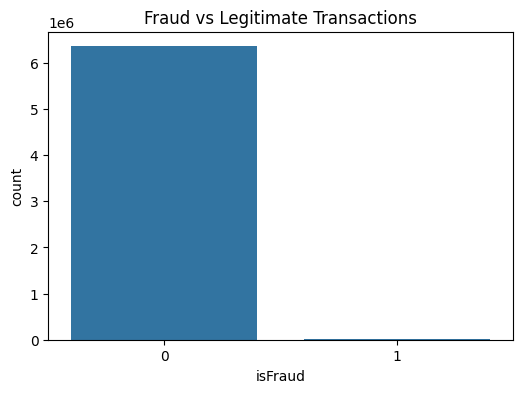

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Legitimate Transactions")
plt.show()

print(df['isFraud'].value_counts(normalize=True))


In [7]:
# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [8]:
columns_to_drop = [
    "nameOrig",
    "nameDest",
    "isFlaggedFraud",
    "isFraud"
]

columns_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns_to_drop, axis=1)
y = df["isFraud"]

print("Final Features Used:")
print(X.columns)


Final Features Used:
Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)


Training Data: (5090096, 7)
Testing Data: (1272524, 7)


In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = RandomForestClassifier(
    n_estimators=100,        # Reduced trees
    max_depth=20,            # Limit tree depth
    min_samples_split=10,    # Avoid too fine splits
    min_samples_leaf=4,      # Prevent tiny leaves
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=4, min_samples_split=10, n_jobs=-1,
                       random_state=42)

In [12]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9992793849074753


In [13]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.66      0.91      0.77      1643

    accuracy                           1.00   1272524
   macro avg       0.83      0.96      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



In [14]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]

roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)


ROC-AUC Score: 0.9991497446720436


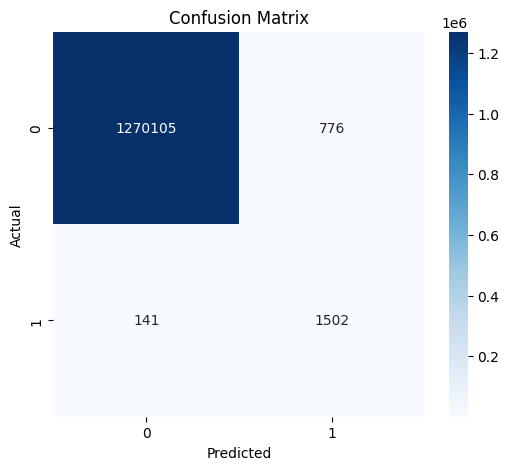

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


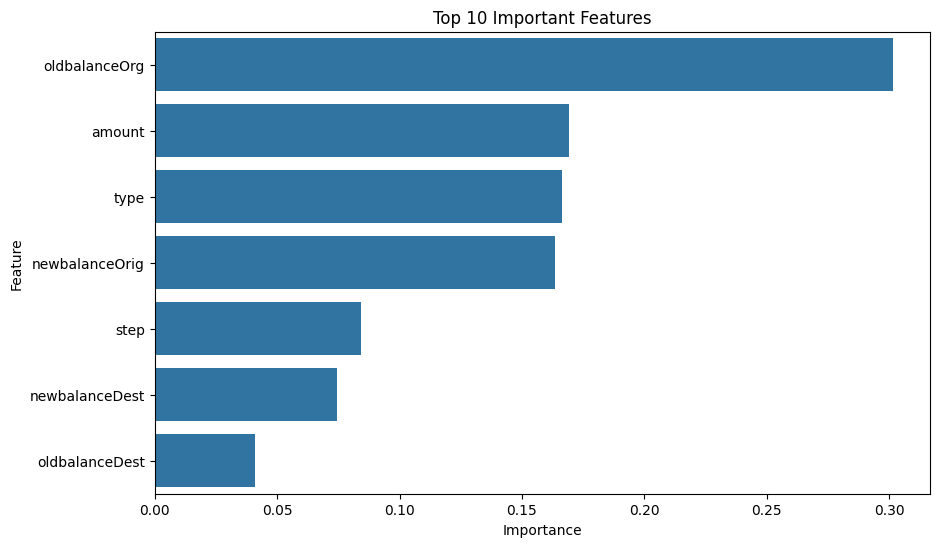

In [16]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances.head(10)
)
plt.title("Top 10 Important Features")
plt.show()


In [17]:
os.makedirs("model", exist_ok=True)

# Save model
pickle.dump(model, open("model/fraud_model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("model/scaler.pkl", "wb"))

# Save feature columns
pickle.dump(X.columns.tolist(), open("model/feature_columns.pkl", "wb"))

print("Model and preprocessing objects saved successfully.")


Model and preprocessing objects saved successfully.


In [18]:
# Load back to verify
loaded_model = pickle.load(open("model/fraud_model.pkl", "rb"))
loaded_scaler = pickle.load(open("model/scaler.pkl", "rb"))

sample = X_test.iloc[0:1]
scaled_sample = loaded_scaler.transform(sample)

prediction = loaded_model.predict(scaled_sample)
print("Sample Prediction:", prediction)


Sample Prediction: [0]


In [19]:
import pickle
import pandas as pd

# Load objects
loaded_model = pickle.load(open("model/fraud_model.pkl", "rb"))
loaded_scaler = pickle.load(open("model/scaler.pkl", "rb"))
feature_columns = pickle.load(open("model/feature_columns.pkl", "rb"))

# Take one sample
sample = X_test.iloc[[0]]
scaled_sample = loaded_scaler.transform(sample)

prediction = loaded_model.predict(scaled_sample)
probability = loaded_model.predict_proba(scaled_sample)

print("Prediction:", prediction[0])
print("Fraud Probability:", probability[0][1])


Prediction: 0
Fraud Probability: 0.0001928760426558125
